In [84]:
# Libraries for R^2 visualization
from ipywidgets import interactive, IntSlider, FloatSlider
from math import floor, ceil
from sklearn.base import BaseEstimator, RegressorMixin

# Libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Library for working locally or Colab
import sys

In [85]:
# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# I. Wrangle Data

In [86]:
#import our data
import pandas as pd
col_names = ['year', 'incumbent', 'chalenger', 'income', 'fatalities', 'incumbent_vote_share']
df = pd.read_csv(DATA_PATH + 'elections/bread_peace_voting.csv', names = col_names, header= 0, index_col= 'year')
print(df.shape)
df

(17, 5)


,incumbent,chalenger,income,fatalities,incumbent_vote_share
year,,,,,
1952,Stevenson,Eisenhower,2.40,190,44.60
1956,Eisenhower,Stevenson,2.89,0,57.76
1960,Nixon,Kennedy,0.85,0,49.91
1964,Johnson,Goldwater,4.21,1,61.34
1968,Humphrey,Nixon,3.02,146,49.60
1972,Nixon,McGovern,3.62,0,61.79
1976,Ford,Carter,1.08,2,48.95
1980,Carter,Reagan,-0.39,0,44.70
1984,Reagan,Mondale,3.86,0,59.17


Perfom EDA

In [87]:
# get the information about the data, we have 2 categorical data, because Linear Reg is a mathematical model, we cant use it
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1952 to 2016
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incumbent             17 non-null     object 
 1   chalenger             17 non-null     object 
 2   income                17 non-null     float64
 3   fatalities            17 non-null     int64  
 4   incumbent_vote_share  17 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 816.0+ bytes


Text(0.5, 1.0, 'relationship between between Income and vote share')

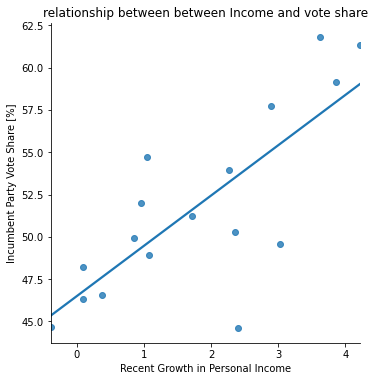

In [88]:
#lets visualize the relationship between between Income and vote share

import seaborn as sns
sns.lmplot(x = 'income', y = 'incumbent_vote_share', data = df,ci= None)
plt.xlabel('Recent Growth in Personal Income')
plt.ylabel('Incumbent Party Vote Share [%]')
plt.title('relationship between between Income and vote share')


Text(0.5, 1.0, 'relationship between falalities and incumbent vote share')

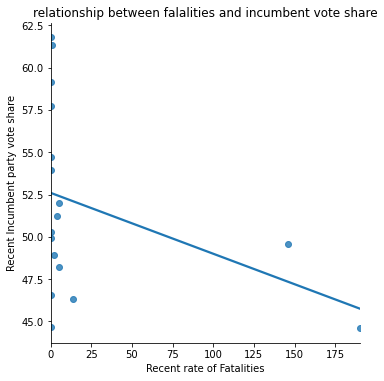

In [89]:
#lets visualize the relationship between between vote share and fatalities

import seaborn as sns
sns.lmplot(x = 'fatalities', y = 'incumbent_vote_share', data = df,ci= None)
plt.xlabel('Recent rate of Fatalities')
plt.ylabel('Recent Incumbent party vote share')
plt.title('relationship between falalities and incumbent vote share')

In [90]:
#df = wrangle(DATA_PATH + 'elections/bread_peace_voting.csv')

# II. Split Data

**First** we need to split our **target vector** from our **feature matrix**.

In [91]:
y = df['incumbent_vote_share'] # one- dimensional
X = df[['income']] # two dimensional

**Second** we need to split our dataset into **training** and **test** sets.

Two strategies:

- Random train-test split using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Generally we use 80% of the data for training, and 20% of the data for testing.
- If you have **timeseries**, then you need to do a "cutoff" split.

In [92]:
#we have a time series data, we will use cut off methods

cut_off = 2008
mask = X.index < 2008
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]
y_test

year
2008    46.32
2012    52.00
2016    48.20
Name: incumbent_vote_share, dtype: float64

Another good way to do a cut off if you do not have time series data but would want it to start from a certain row

In [93]:
#cutoff = int(len(X)*0.8)
#X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
#X_test, y_test = X.iloc[cutoff:], y .iloc[cutoff:]
#X_test

In [94]:
import plotly.express as px
px.scatter(
    df, 
    x = 'income',
    y = 'incumbent_vote_share',
    #text = 'year',
    title = 'Trends to show the relationship between Income and Incumbent vote share',
    trendline = 'ols',
)

# III. Establish Baseline

In [95]:
from sklearn.metrics import mean_absolute_error
y_pred = [y_train.mean()] * len(y_train)
print('Mean Incumbent Vote Share:', y_train.mean())
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Mean Incumbent Vote Share: 52.46857142857142
Baseline MAE: 4.846938775510204


# IV. Build Model

-

In [1]:
#import the class
from sklearn.linear_model import LinearRegression

#instatiate the class
model = LinearRegression()

#fit the model
model.fit(XTT_train, y_train);

NameError: ignored

# V. Check Metrics

## Mean Absolute Error

The unit of measurement is the same as the unit of measurment for your target (in this case, vote share [%]).

In [97]:
print('Training MAE', mean_absolute_error(y_train, model.predict(X_train)))
print('Test MAE', mean_absolute_error(y_test, model.predict(X_test)))

Training MAE 2.645479454315596
Test MAE 1.7998717748375863


## Root Mean Squared Error

The unit of measurement is the same as the unit of measurment for your target (in this case, vote share [%]).

In [98]:
from sklearn.metrics import mean_squared_error
print('Training RMSE:', mean_squared_error(y_train, model.predict(X_train), squared = False))
print('Test RMSE', mean_squared_error(y_test, model.predict(X_test), squared = False))

Training RMSE: 3.6773568396257406
Test RMSE 2.180652086836372


## $R^2$ Score

TL;DR: Usually ranges between 0 (bad) and 1 (good).

In [99]:
class BruteForceRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, m=0, b=0):
        self.m = m
        self.b = b
        self.mean = 0
        
    def fit(self, X, y):
        self.mean = np.mean(y)
        return self
    
    def predict(self, X, return_mean=True):
        if return_mean:
            return [self.mean] * len(X)
        else:
            return X * self.m + self.b

def plot(slope, intercept):
    # Assign data to variables
    x = df['income']
    y = df['incumbent_vote_share']
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    
    # Set ax limits
    mar = 0.2
    x_lim = floor(x.min() - x.min()*mar), ceil(x.max() + x.min()*mar)
    y_lim = floor(y.min() - y.min()*mar), ceil(y.max() + y.min()*mar)
    
    # Instantiate and train model
    bfr = BruteForceRegressor(slope, intercept)
    bfr.fit(x, y)
    
    # ax1   
    ## Plot data
    ax1.set_xlim(x_lim)
    ax1.set_ylim(y_lim)
    ax1.scatter(x, y)
    
    ## Plot base model
    ax1.axhline(bfr.mean, color='orange', label='baseline model')
    
    ## Plot residual lines
    y_base_pred = bfr.predict(x)
    ss_base = mean_squared_error(y, y_base_pred) * len(y)
    for x_i, y_i, yp_i in zip(x, y, y_base_pred):
        ax1.plot([x_i, x_i], [y_i, yp_i], 
                 color='gray', linestyle='--', alpha=0.75)
    
    ## Formatting
    ax1.legend()
    ax1.set_title(f'Sum of Squares: {np.round(ss_base, 2)}')
    ax1.set_xlabel('Growth in Personal Incomes')
    ax1.set_ylabel('Incumbent Party Vote Share [%]')

    # ax2

    ax2.set_xlim(x_lim)
    ax2.set_ylim(y_lim)
    ## Plot data
    ax2.scatter(x, y)
    
    ## Plot model
    x_model = np.linspace(*ax2.get_xlim(), 10)
    y_model = bfr.predict(x_model, return_mean=False)
    ax2.plot(x_model, y_model, color='green', label='our model')
    for x_coord, y_coord in zip(x, y):
        ax2.plot([x_coord, x_coord], [y_coord, x_coord * slope + intercept], 
                 color='gray', linestyle='--', alpha=0.75)   
    
    ss_ours = mean_squared_error(y, bfr.predict(x, return_mean=False)) * len(y)
    
    ## Formatting
    ax2.legend()
    ax2.set_title(f'Sum of Squares: {np.round(ss_ours, 2)}')
    ax2.set_xlabel('Growth in Personal Incomes')
    ax2.set_ylabel('Incumbent Party Vote Share [%]')

y = df['incumbent_vote_share']
slope_slider = FloatSlider(min=-5, max=5, step=0.5, value=0)
intercept_slider = FloatSlider(min=int(y.min()), max=y.max(), step=2, value=y.mean())
    
interactive(plot, slope=slope_slider, intercept=intercept_slider)

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0, step=0.5), FloatSlider(va…

In [104]:
from sklearn.metrics import r2_score
print('Training R2', r2_score(y_train, model.predict(X_train)))
print('Test R2', r2_score(y_test, model.predict(X_test)))

Training R2 0.5663905156461234
Test R2 0.14809080764669635


In [105]:
#Another way to print r2 score
print('Training R2', model.score(X_train, y_train))
print('Test R2', model.score(X_test, y_test))

Training R2 0.5663905156461234
Test R2 0.14809080764669635


# VI. Communicate Results

**Challenge:** How can we find the coefficients and intercept for our `model`?

In [ ]:
MULIPLE linear regression

In [108]:
y = df['incumbent_vote_share'] # one- dimensional
X = df[['income', 'fatalities']] # two dimensional

In [109]:
cut_off = 2008
mask = X.index < 2008
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]
y_test

year
2008    46.32
2012    52.00
2016    48.20
Name: incumbent_vote_share, dtype: float64

In [110]:
#import the class
from sklearn.linear_model import LinearRegression

#instatiate the class
model = LinearRegression()

#fit the model
model.fit(X_train, y_train);

In [111]:
from sklearn.metrics import r2_score
print('Training R2', r2_score(y_train, model.predict(X_train)))
print('Test R2', r2_score(y_test, model.predict(X_test)))

Training R2 0.8739958896016927
Test R2 0.3792995526663848


from statsmodels.formula.api import ols

In [117]:
f'Vote_shares = {model.intercept_} + {model.coef_[0]} *income + {model.coef_[1]}  * fatalities' 

'Vote_shares = 46.25489966153873 + 3.5900473494560536 *income + -0.05315709351049324  * fatalities'